Virtual Acoustics and Immersive Audio Workshop - CCRMA Stanford University  
25.07.25 - Orchisama Das, Gloria Dal Santo
  
### L05: Modeling Acoustics in Coupled Spaces

In this assignment we will 
- Analyize the EDC of a couple room space 
- Given a set of common slope parameters, synthesize the EDC and compare it with the one measured 

In [1]:
# --- Imports ---
import pickle
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import sys, os
sys.path.append(rf'C:\Users\Tanay Mannikar\Documents\VAIAWorkshop25Public\src')
from room_acoustics.analysis import compute_edc
from room_acoustics.synthesis import decay_kernel
from utils import filterbank

#### 1. Load the SRIR and plot the EDC 

The srirs are stored in `srirs_sampled.pkl` as a dictionary. You can use `srir_set.keys()` to list all the fields it contains. 

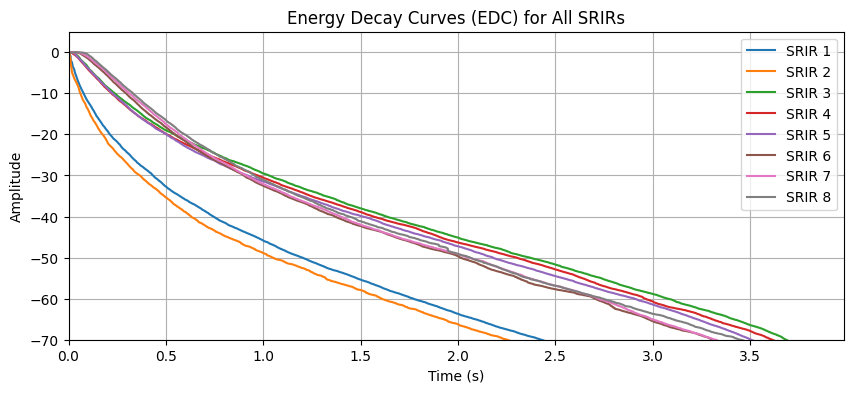

In [2]:
# --- Load the SRIRs and plot their EDC ---

output_filepath = Path('..') / 'data' / 'srirs_sampled.pkl'
with open(output_filepath, 'rb') as f:
    srir_set = pickle.load(f)

srirs = srir_set['srirs']
fs = srir_set['fs'].item()
n_srirs = srirs.shape[0]
ir_len = srirs.shape[1]
f_bands = [63, 125, 250, 500, 1000, 2000, 4000, 8000]

plt.figure(figsize=(10, 4))
for idx in range(n_srirs):
    rir = srirs[idx, :]
    edc_curve = compute_edc(rir)
    time = np.arange(len(edc_curve)) / fs
    plt.plot(time, edc_curve, label=f'SRIR {idx+1}')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(0, time[-1])
plt.ylim(-70, 5)
plt.grid(True)
plt.legend()
plt.title('Energy Decay Curves (EDC) for All SRIRs')
plt.show()

#### 2. Synthesize the EDC from the Common Slopes Parameters

- 2.1 Head to `room_acoustics.synthesis`, you will find a partially coded function `decay_kernel` which will generate an exponential envelope decaying at the specified reverberation time. 
- 2.2 Multiply the decay envelopes by their respective amplitudes
- 2.3 Plot the individual scaled slopes and the summed ones (i.e. the synthesized EDCs). 

(8, 3) (8, 128001, 3)


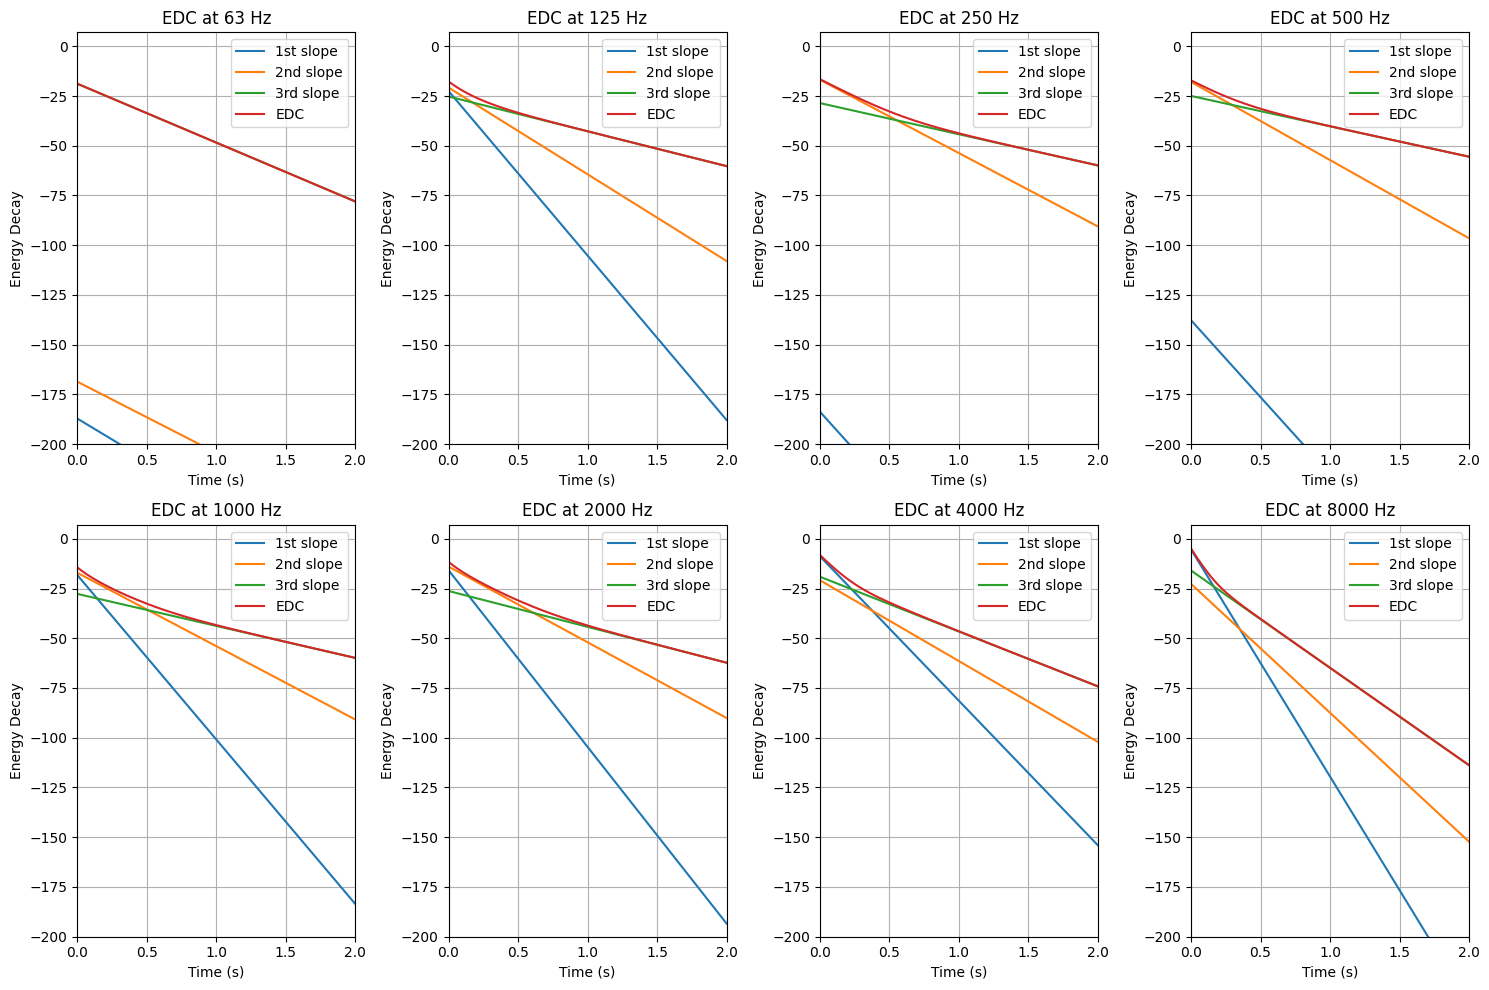

In [ ]:
indx = 2

time_axis = np.arange(0, ir_len) / fs
envelope_decay = decay_kernel (np.squeeze(srir_set['common_decay_times']), 
                               time_axis, 
                               fs, 
                               normalize_envelope=False, 
                               add_noise=False)
# multiply the amplitudes of the SRIRs with the envelope decay to synthesize the EDC
print(srir_set['amplitudes'][..., indx].shape, envelope_decay.shape)
edc = np.einsum('nb, ntb -> ntb', srir_set['amplitudes'][..., indx], envelope_decay)
# NOTE: the amplitudes are stored in the 'amplitudes' key of the srir_set dictionary. You have to access it via srir_set['amplitudes']

n_bands = len(f_bands)
plt.figure(figsize=(15, 10))
error = []
for i in range(n_bands):
    plt.subplot(2, 4, i+1)
    plt.plot(time_axis, 10*np.log10(edc[i, :, 0]), label='1st slope')
    plt.plot(time_axis, 10*np.log10(edc[i, :, 1]), label='2nd slope')
    plt.plot(time_axis, 10*np.log10(edc[i, :, 2]), label='3rd slope')
    plt.plot(time_axis, 10*np.log10(np.sum(edc[i], axis=-1)), label='EDC')
    plt.xlabel('Time (s)')
    plt.ylabel('Energy Decay')
    plt.legend()
    plt.title(f'EDC at {f_bands[i]} Hz')
    plt.ylim([-200, 7])
    plt.xlim([0, 2])
    plt.grid(True)

plt.tight_layout()
plt.show()

#### 3. Compare the EDC with the ground truth

- 3.1 Compute the EDC from the ground truth (GT) SRIR (accessable at `srir_set['srirs']`)
- 3.2 Plot the GT EDC and the synthesized ones after normalizing them so that they start at 0 dB at time 0

C:\Users\Tanay Mannikar\AppData\Local\Temp\ipykernel_13300\371154813.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


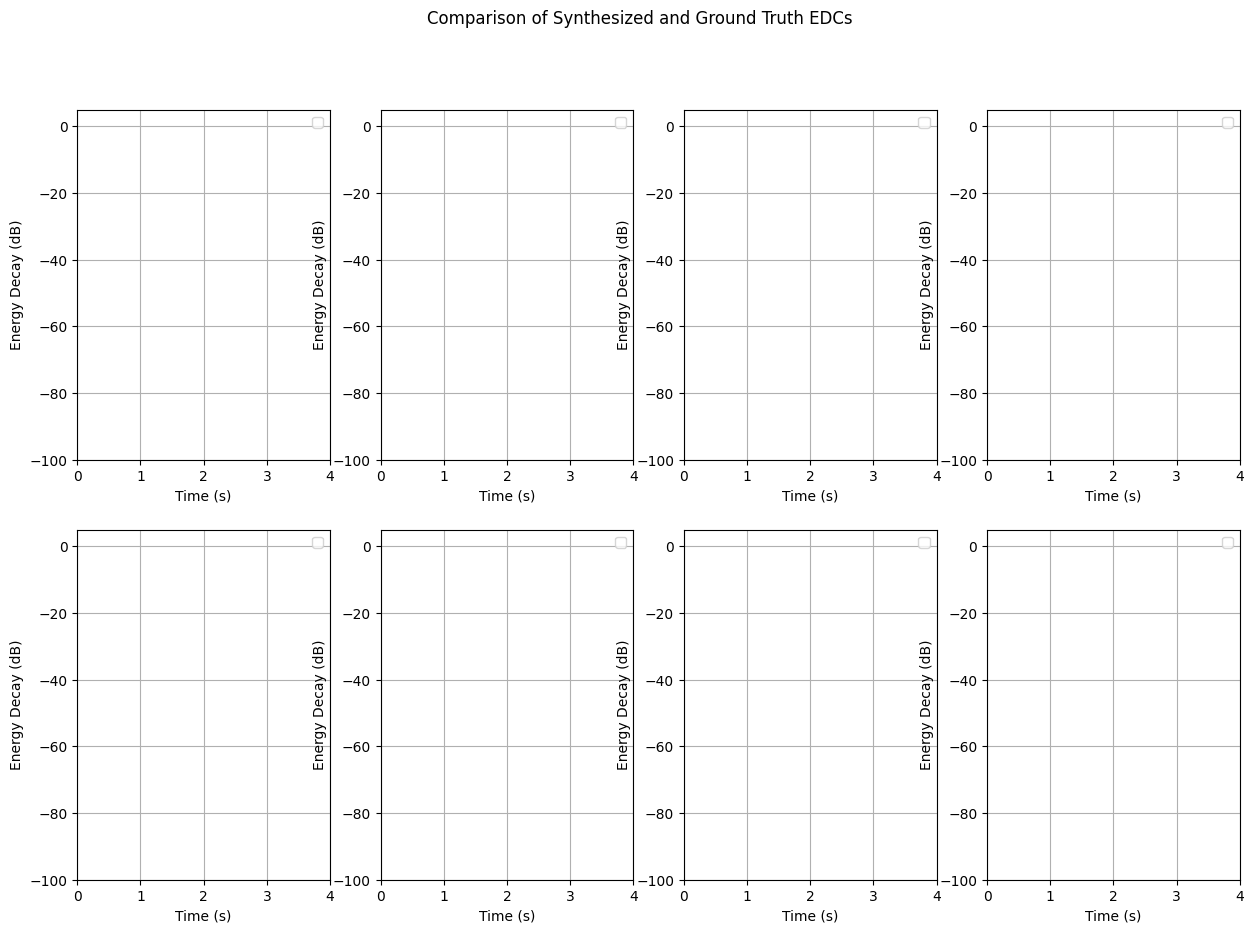

In [4]:
# --- Compare the EDC with the ground truth ---

#### WRITE YOUR CODE HERE ####
# Select the SRIRs to compare (you have 8 SRIRs in total, access to one of them is given by `srirs[indx]`)
# Filter the SRIR with a filterbank

# plot the EDCs of the SRIRs and the synthesized EDCs
plt.figure(figsize=(15, 10))
for i in range(n_bands):
    plt.subplot(2, 4, i+1)
    # filter the SRIRs 

    ### WRITE YOUR CODE HERE ####
    # compute the ground truth EDC for the SRIRs
    # plot the ground truth EDC and the synthesized EDC (in dB)

    plt.xlabel('Time (s)')
    plt.ylabel('Energy Decay (dB)')
    plt.xlim(0, time_axis[-1])
    plt.ylim(-100, 5)
    plt.grid(True)
    plt.legend()
plt.suptitle('Comparison of Synthesized and Ground Truth EDCs')
plt.show()